


<h1><center>Tiền xử lý dữ liệu cho dữ liệu về dự đoán phim xu hướng </center></h1>

In [ ]:
import numpy as np
import pandas as pd

# 🎬 Giới thiệu về Dữ liệu MovieLens

- **Nguồn dữ liệu**:  
  Bộ dữ liệu MovieLens được cung cấp bởi **GroupLens Research**, là một trong những bộ dữ liệu nổi tiếng nhất cho các bài toán hệ thống gợi ý.

- **Mục đích sử dụng**:  
  MovieLens được sử dụng để **huấn luyện và đánh giá** các mô hình gợi ý.

- **Cấu trúc dữ liệu**:
  - `movies.csv`: Thông tin phim gồm:
    - `movieId`: ID của phim
    - `title`: Tên phim
    - `genres`: Thể loại (nhiều thể loại cách nhau bằng dấu `|`)
  - `ratings.csv`: Thông tin đánh giá gồm:
    - `userId`: ID người dùng
    - `movieId`: ID phim
    - `rating`: Điểm đánh giá (từ 0.5 đến 5.0, bước 0.5)
    - `timestamp`: Thời gian đánh giá


In [ ]:
# Đọc các file CSV
movies = pd.read_csv('/content/movies.csv')
ratings = pd.read_csv('/content/ratings.csv', usecols=['movieId', 'rating','userId'])


In [ ]:
ratings.shape

(126769, 3)

In [ ]:
ratings.head(10)

,userId,movieId,rating
0,1,17,4.0
1,1,25,1.0
2,1,29,2.0
3,1,30,5.0
4,1,32,5.0
5,1,34,2.0
6,1,36,1.0
7,1,80,5.0
8,1,110,3.0
9,1,111,5.0


In [ ]:
num_users = ratings['userId'].nunique()
num_movies = ratings['movieId'].nunique()
print(f"Số lượng người dùng: {num_users}")
print(f"Số lượng phim: {num_movies}")

Số lượng người dùng: 810
Số lượng phim: 11114


In [ ]:
ratings.dtypes

,0
userId,int64
movieId,int64
rating,float64


In [ ]:
ratings.describe()

,userId,movieId,rating
count,126769.000000,126769.000000,126769.000000
mean,395.751272,28137.122530,3.530276
std,224.936745,49791.777501,1.063888
min,1.000000,1.000000,0.500000
25%,208.000000,1222.000000,3.000000
50%,380.000000,3408.000000,3.500000
75%,588.000000,40583.000000,4.000000
max,810.000000,291485.000000,5.000000


In [ ]:
movies.shape

(87585, 3)

In [ ]:
movies.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


# Tiền xử lý dữ liệu

 ## 📊 Xử lý genres thành vector dạng số (one-hot)
 - 🎯 Mục tiêu:
Từ Adventure|Animation|Children|Comedy|Fantasy

Thành column tương ứng với các thể loại phim

In [ ]:
movies['genres_list'] = movies['genres'].str.split('|')

# Lấy danh sách tất cả thể loại duy nhất
all_genres = sorted(set(genre for genres in movies['genres_list'] for genre in genres))

for genre in all_genres:
    movies[genre] = movies['genres_list'].apply(lambda x: int(genre in x))

movies.drop(columns='genres_list', inplace=True)
movies.drop(columns='genres', inplace=True)
movies.drop(columns='(no genres listed)', inplace=True)


In [ ]:
movies.head(10)

,movieId,title,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,6,Heat (1995),1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
6,7,Sabrina (1995),0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7,8,Tom and Huck (1995),0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,9,Sudden Death (1995),1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,GoldenEye (1995),1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
movies.dtypes

,0
movieId,int64
title,object
Action,int64
Adventure,int64
Animation,int64
Children,int64
Comedy,int64
Crime,int64
Documentary,int64
Drama,int64


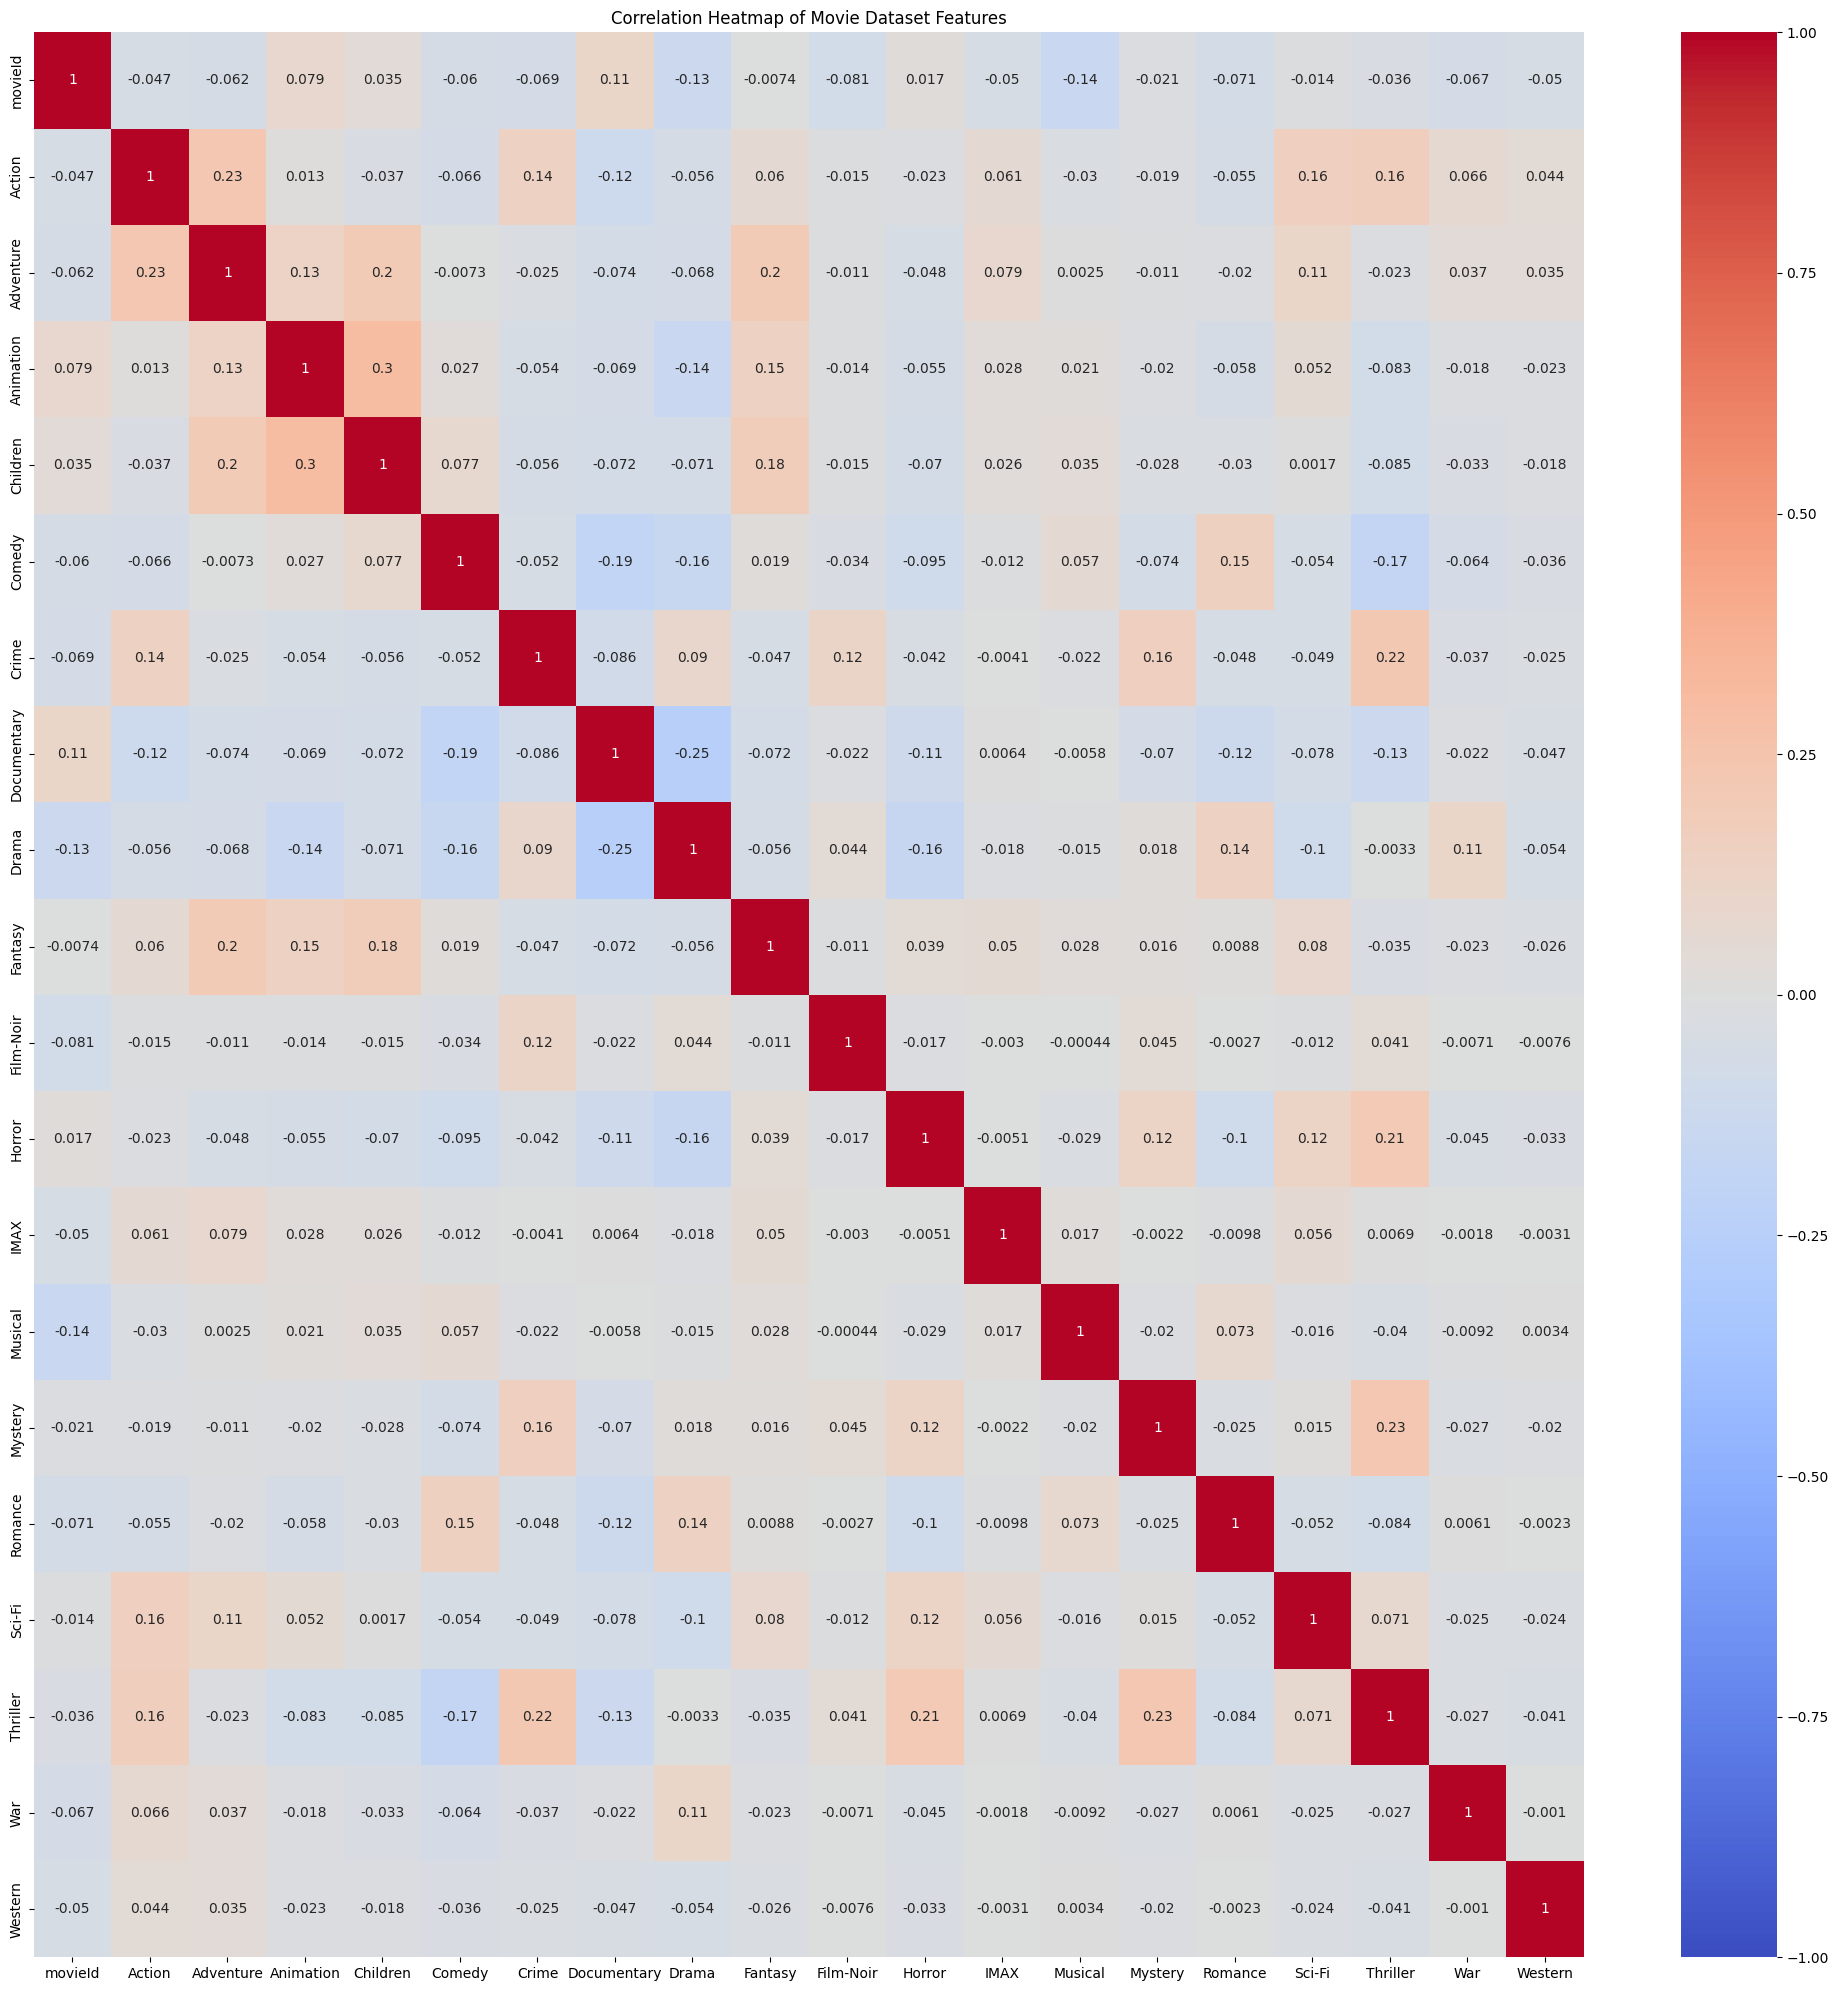

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_df = movies.select_dtypes(include=['int64'])

corr_matrix = numeric_df.corr()

plt.figure(figsize=(25, 25))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Movie Dataset Features')
plt.show()

# Dự đoán điểm đánh giá + Gợi ý danh sách phim
Label: rating (giá trị thực, thường từ 0.5 đến 5.0)

Input: userId, movieId, genre, tag, etc.

👉 Bài toán học có giám sát, hồi quy.

In [ ]:
!pip install torch-geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 20.5 MB/s eta 0:00:00


In [ ]:
# import torch
# import torch_geometric
# print(torch.__version__)
# print(torch_geometric.__version__)

## Xây dựng đồ thị

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import numpy as np
from torch_geometric.data import Data
from torch_geometric.nn import LightGCN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

### Xử lý đặc trưng thể loại phim

In [ ]:
# 1. Đếm số lượng người dùng và phim
num_users = len(ratings['userId'].unique())
num_movies = len(ratings['movieId'].unique())
print(f"Số lượng người dùng: {num_users}")
print(f"Số lượng phim: {num_movies}")

Số lượng người dùng: 810
Số lượng phim: 11114


In [ ]:
# 2. Xử lý đặc trưng thể loại phim
genre_columns = [col for col in movies.columns if col not in ['movieId', 'title']]
num_genres = len(genre_columns)
movie_features_genres = torch.tensor(movies[genre_columns].values, dtype=torch.float)

# Kiểm tra giá trị đặc trưng phim
if not torch.all(movie_features_genres >= 0):
    raise ValueError("Đặc trưng thể loại phim phải không âm")

# Tạo DataFrame để hiển thị (tùy chọn)
movie_features_df = pd.DataFrame(
    movie_features_genres.numpy(),
    index=movies['movieId'],
    columns=genre_columns
)
print("\nĐặc trưng thể loại phim:")
print(movie_features_df.head())


Đặc trưng thể loại phim:
         Action  Adventure  Animation  Children  Comedy  Crime  Documentary  \
movieId                                                                       
1           0.0        1.0        1.0       1.0     1.0    0.0          0.0   
2           0.0        1.0        0.0       1.0     0.0    0.0          0.0   
3           0.0        0.0        0.0       0.0     1.0    0.0          0.0   
4           0.0        0.0        0.0       0.0     1.0    0.0          0.0   
5           0.0        0.0        0.0       0.0     1.0    0.0          0.0   

         Drama  Fantasy  Film-Noir  Horror  IMAX  Musical  Mystery  Romance  \
movieId                                                                       
1          0.0      1.0        0.0     0.0   0.0      0.0      0.0      0.0   
2          0.0      1.0        0.0     0.0   0.0      0.0      0.0      0.0   
3          0.0      0.0        0.0     0.0   0.0      0.0      0.0      1.0   
4          1.0      0.0  

In [ ]:
# 3. Tạo ma trận thưa đặc trưng phim
non_zero_indices = torch.nonzero(movie_features_genres, as_tuple=False).t()
genre_values = movie_features_genres[non_zero_indices[0], non_zero_indices[1]]
if non_zero_indices.size(1) == 0:
    raise ValueError("Không có giá trị thể loại khác 0")
movie_features = torch.sparse_coo_tensor(non_zero_indices, genre_values, (num_movies, num_genres))

# Hiển thị chỉ số các phần tử khác 0 (tùy chọn)
genre_indices_df = pd.DataFrame(
    non_zero_indices.t().numpy(),
    columns=['movie_idx', 'genre_idx']
)
print("\nChỉ số của các phần tử khác 0:")
print(genre_indices_df.head())


Chỉ số của các phần tử khác 0:
   movie_idx  genre_idx
0          0          1
1          0          2
2          0          3
3          0          4
4          0          8


In [ ]:
# 4. Tạo cạnh (edge) và trọng số
# Ánh xạ userId và movieId để đảm bảo chỉ số liên tục
user_id_map = {id: idx for idx, id in enumerate(ratings['userId'].unique())}
movie_id_map = {id: idx for idx, id in enumerate(ratings['movieId'].unique())}
movie_id_map_inv = {idx: id for id, idx in movie_id_map.items()}  # Ánh xạ đảo ngược
edge_index = torch.tensor([
    ratings['userId'].map(user_id_map).values,
    ratings['movieId'].map(movie_id_map).values + num_users
], dtype=torch.long)
edge_weight = torch.tensor(ratings['rating'].values, dtype=torch.float)

# Kiểm tra cạnh
if edge_index.max() >= num_users + num_movies:
    raise ValueError("Chỉ số cạnh vượt quá số lượng nút")

/tmp/ipython-input-20-2884575526.py:6: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /pytorch/torch/csrc/utils/tensor_new.cpp:254.)
  edge_index = torch.tensor([


### Tạo đặc trưng cho người dùng

In [ ]:
# 5. b (dựa trên lịch sử đánh giá) với chunking
user_genre_scores = torch.zeros((num_users, num_genres), dtype=torch.float32)
chunk_size = 100000  # Điều chỉnh tùy theo RAM

for start in range(0, len(ratings), chunk_size):
    chunk = ratings[['userId', 'movieId']].iloc[start:start + chunk_size]
    merged_chunk = chunk.merge(movies[['movieId'] + genre_columns], on='movieId', how='left')
    chunk_means = merged_chunk.groupby('userId')[genre_columns].mean()

    for uid in chunk_means.index:
        if uid in user_id_map:
            user_idx = user_id_map[uid]
            user_genre_scores[user_idx] = torch.tensor(chunk_means.loc[uid].values, dtype=torch.float32)

# Tạo ma trận thưa
user_non_zero_indices = torch.nonzero(user_genre_scores, as_tuple=False).t()
user_values = user_genre_scores[user_non_zero_indices[0], user_non_zero_indices[1]]
user_features = torch.sparse_coo_tensor(
    user_non_zero_indices,
    user_values,
    (num_users, num_genres)
)

# 6. Kết hợp đặc trưng người dùng và phim
movie_indices_adjusted = movie_features._indices().clone()
movie_indices_adjusted[0] += num_users
x_indices = torch.cat([user_features._indices(), movie_indices_adjusted], dim=1)
x_values = torch.cat([user_features._values(), movie_features._values()])
x = torch.sparse_coo_tensor(x_indices, x_values, (num_users + num_movies, num_genres))

# Kiểm tra ma trận đặc trưng
if x.size(0) != num_users + num_movies:
    raise ValueError("Kích thước ma trận đặc trưng không khớp")

# In thông tin để kiểm tra
print(f"Số dòng ratings: {len(ratings)}")
print(f"Kích thước user_genre_scores: {user_genre_scores.shape}")
print(f"Số phần tử khác 0 trong user_features: {user_non_zero_indices.size(1)}")

Số dòng ratings: 126769
Kích thước user_genre_scores: torch.Size([810, 19])
Số phần tử khác 0 trong user_features: 13196


### Tạo đối tượng Data

In [ ]:
# 7. Tạo đối tượng Data
data = Data(x=x, edge_index=edge_index, edge_attr=edge_weight)

# Kiểm tra đối tượng Data
data.validate(raise_on_error=True)
print("Kích thước ma trận đặc trưng:", x.size())
print("Kích thước ma trận cạnh:", edge_index.size())
print("Kích thước trọng số cạnh:", edge_weight.size())

Kích thước ma trận đặc trưng: torch.Size([11924, 19])
Kích thước ma trận cạnh: torch.Size([2, 126769])
Kích thước trọng số cạnh: torch.Size([126769])


## Chia dữ liệu train/test

In [ ]:
# Chia dữ liệu train/test (80/20)
train_edge_index, test_edge_index, train_edge_weight, test_edge_weight = train_test_split(
    edge_index.t().numpy(), edge_weight.numpy(), test_size=0.2, random_state=42
)

# Chuyển lại thành tensor
train_edge_index = torch.tensor(train_edge_index, dtype=torch.long).t()
test_edge_index = torch.tensor(test_edge_index, dtype=torch.long).t()
train_edge_weight = torch.tensor(train_edge_weight, dtype=torch.float)
test_edge_weight = torch.tensor(test_edge_weight, dtype=torch.float)

# Tạo dữ liệu train/test
train_data = Data(x=x, edge_index=train_edge_index, edge_attr=train_edge_weight)
test_data = Data(x=x, edge_index=test_edge_index, edge_attr=test_edge_weight)

# Loại bỏ cạnh không hợp lệ
num_nodes = num_users + num_movies
valid_indices = (train_data.edge_index[0] < num_nodes) & (train_data.edge_index[1] < num_nodes)
train_data.edge_index = train_data.edge_index[:, valid_indices]
train_data.edge_attr = train_data.edge_attr[valid_indices]

valid_indices_test = (test_data.edge_index[0] < num_nodes) & (test_data.edge_index[1] < num_nodes)
test_data.edge_index = test_data.edge_index[:, valid_indices_test]
test_data.edge_attr = test_data.edge_attr[valid_indices_test]

# Tách tập validation từ train_data
def split_train_val(data, val_ratio=0.2):
    edge_index_np = data.edge_index.t().numpy()
    edge_attr_np = data.edge_attr.numpy()

    train_idx, val_idx, train_weight, val_weight = train_test_split(
        edge_index_np, edge_attr_np, test_size=val_ratio, random_state=123
    )

    train_edge_index = torch.tensor(train_idx, dtype=torch.long).t()
    val_edge_index = torch.tensor(val_idx, dtype=torch.long).t()
    train_edge_attr = torch.tensor(train_weight, dtype=torch.float)
    val_edge_attr = torch.tensor(val_weight, dtype=torch.float)

    train_split = Data(x=data.x, edge_index=train_edge_index, edge_attr=train_edge_attr)
    val_split = Data(x=data.x, edge_index=val_edge_index, edge_attr=val_edge_attr)

    return train_split, val_split

# Gọi hàm chia
train_data, val_data = split_train_val(train_data)

# Kiểm tra
print("Max index in train_data.edge_index:", train_data.edge_index.max().item())
print("Min index in train_data.edge_index:", train_data.edge_index.min().item())
assert train_data.edge_index.max().item() <= num_nodes - 1, "Chỉ số vượt quá số node!"
print(f"Số cạnh train: {train_data.edge_index.shape[1]}")
print(f"Số cạnh test: {test_data.edge_index.shape[1]}")

Max index in train_data.edge_index: 11923
Min index in train_data.edge_index: 0
Số cạnh train: 81132
Số cạnh test: 25354


## LightGCNRecommender

In [ ]:
class LightGCNRecommender(nn.Module):
    def __init__(self, num_nodes, embedding_dim, num_layers):
        super(LightGCNRecommender, self).__init__()
        self.embedding = nn.Embedding(num_nodes, embedding_dim)
        self.num_layers = num_layers
        self.num_nodes = num_nodes
        nn.init.normal_(self.embedding.weight, std=0.1)

    def forward(self, edge_index):
        x = self.embedding.weight
        x_0 = x
        for _ in range(self.num_layers):
            x = self.propagate(x, edge_index)
        x = (x_0 + x) / (self.num_layers + 1)
        return x

    def propagate(self, x, edge_index):
        src, dst = edge_index
        assert src.max() < self.num_nodes, f"src index {src.max()} vượt quá {self.num_nodes}"
        assert dst.max() < self.num_nodes, f"dst index {dst.max()} vượt quá {self.num_nodes}"

        src_emb = x[src]
        row_sum = torch.zeros(self.num_nodes, x.shape[1]).to(x.device)
        row_sum.index_add_(0, src, src_emb)
        row_count = torch.zeros(self.num_nodes).to(x.device)
        row_count.index_add_(0, src, torch.ones_like(src, dtype=torch.float))
        x = row_sum / (row_count.unsqueeze(1) + 1e-10)
        return x

## Training

Đang thử: dim=64, layers=1, lr=0.005
Validation Loss = 5.1512
Đang thử: dim=64, layers=1, lr=0.01
Validation Loss = 1.6157
Đang thử: dim=64, layers=1, lr=0.015
Validation Loss = 2.2839
Đang thử: dim=64, layers=1, lr=0.02
Validation Loss = 2.1228
Đang thử: dim=64, layers=2, lr=0.005
Validation Loss = 9.2480
Đang thử: dim=64, layers=2, lr=0.01
Validation Loss = 2.2419
Đang thử: dim=64, layers=2, lr=0.015
Validation Loss = 1.6506
Đang thử: dim=64, layers=2, lr=0.02
Validation Loss = 1.9592
Đang thử: dim=128, layers=1, lr=0.005
Validation Loss = 2.4917
Đang thử: dim=128, layers=1, lr=0.01
Validation Loss = 2.3982
Đang thử: dim=128, layers=1, lr=0.015
Validation Loss = 2.3357
Đang thử: dim=128, layers=1, lr=0.02
Validation Loss = 2.5528
Đang thử: dim=128, layers=2, lr=0.005
Validation Loss = 6.5018
Đang thử: dim=128, layers=2, lr=0.01
Validation Loss = 1.6895
Đang thử: dim=128, layers=2, lr=0.015
Validation Loss = 2.1291
Đang thử: dim=128, layers=2, lr=0.02
Validation Loss = 2.2250

=== Kết

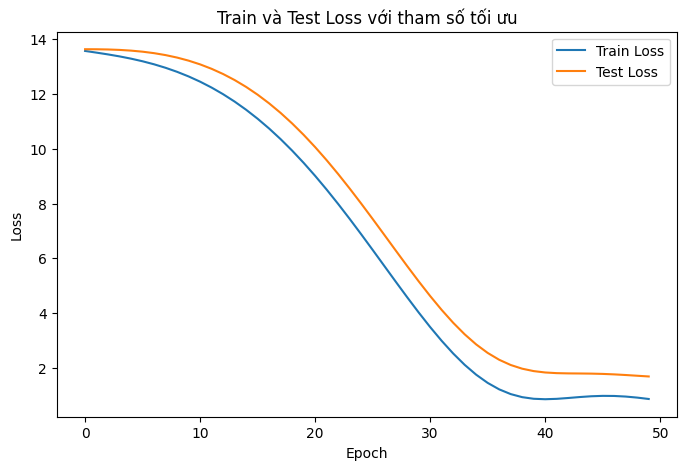

In [ ]:
# Hàm tính loss
def compute_loss(embeddings, edge_index, edge_weight):
    user_emb = embeddings[edge_index[0]]
    item_emb = embeddings[edge_index[1]]
    pred_ratings = (user_emb * item_emb).sum(dim=1)
    return F.mse_loss(pred_ratings, edge_weight)

# Hàm train 1 mô hình với tham số đã cho, trả về val_loss
def train_and_evaluate(model, optimizer, train_data, val_data, num_epochs=50):
    model.train()
    for epoch in range(num_epochs):
        optimizer.zero_grad()
        embeddings = model(train_data.edge_index)
        loss = compute_loss(embeddings, train_data.edge_index, train_data.edge_attr)
        loss.backward()
        optimizer.step()

    model.eval()
    with torch.no_grad():
        embeddings = model(val_data.edge_index)
        val_loss = compute_loss(embeddings, val_data.edge_index, val_data.edge_attr).item()
    return val_loss

# Danh sách tham số để thử
embedding_dims = [64, 128]
num_layers_list = [1, 2]
learning_rates = [0.005, 0.01, 0.015, 0.02]

best_val_loss = float('inf')
best_params = {}

# Grid Search
for embedding_dim in embedding_dims:
    for num_layers in num_layers_list:
        for lr in learning_rates:
            print(f"Đang thử: dim={embedding_dim}, layers={num_layers}, lr={lr}")

            # Khởi tạo model và optimizer
            model = LightGCNRecommender(num_nodes, embedding_dim, num_layers)
            optimizer = torch.optim.Adam(model.parameters(), lr=lr)

            # Huấn luyện và đánh giá
            val_loss = train_and_evaluate(model, optimizer, train_data, val_data)
            print(f"Validation Loss = {val_loss:.4f}")

            # Cập nhật tham số tốt nhất
            if val_loss < best_val_loss:
                best_val_loss = val_loss
                best_params = {
                    'embedding_dim': embedding_dim,
                    'num_layers': num_layers,
                    'learning_rate': lr
                }

# Hiển thị kết quả tốt nhất
print("\n=== Kết quả tốt nhất ===")
print(f"Validation Loss thấp nhất: {best_val_loss:.4f}")
print("Bộ tham số tối ưu:", best_params)

# (Optional) Huấn luyện lại với bộ tham số tốt nhất
final_model = LightGCNRecommender(num_nodes, best_params['embedding_dim'], best_params['num_layers'])
final_optimizer = torch.optim.Adam(final_model.parameters(), lr=best_params['learning_rate'])

# Huấn luyện lần cuối
train_losses = []
test_losses = []
for epoch in range(50):
    final_model.train()
    final_optimizer.zero_grad()
    embeddings = final_model(train_data.edge_index)
    train_loss = compute_loss(embeddings, train_data.edge_index, train_data.edge_attr)
    train_loss.backward()
    final_optimizer.step()

    final_model.eval()
    with torch.no_grad():
        embeddings = final_model(test_data.edge_index)
        test_loss = compute_loss(embeddings, test_data.edge_index, test_data.edge_attr)

    train_losses.append(train_loss.item())
    test_losses.append(test_loss.item())

    if (epoch + 1) % 10 == 0:
        print(f"[Final Train] Epoch {epoch+1}/50 - Train Loss: {train_loss.item():.4f}, Test Loss: {test_loss.item():.4f}")

# Vẽ biểu đồ loss
plt.figure(figsize=(8, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train và Test Loss với tham số tối ưu')
plt.legend()
plt.show()

## Recommend movies

In [ ]:
def recommend_movies(user_id, top_k=10):
    """
    Gợi ý top_k bộ phim cho người dùng dựa trên mô hình LightGCN.

    Args:
        user_id (int): ID của người dùng.
        top_k (int): Số lượng phim gợi ý

    Returns:
        list: Danh sách top_k bộ phim (movieId, title, score).
        score (điểm) là giá trị thể hiện mức độ phù hợp giữa một người dùng và một bộ phim (item)
    """
    if user_id not in user_id_map:
        raise ValueError(f"user_id {user_id} không tồn tại trong dữ liệu")

    user_idx = user_id_map[user_id]

    model.eval()
    with torch.no_grad():
        embeddings = model(data.edge_index)

        user_emb = embeddings[user_idx]
        item_emb = embeddings[num_users:num_users + num_movies]

        scores = torch.matmul(item_emb, user_emb)

    rated_movies = set(ratings[ratings['userId'] == user_id]['movieId'].values)

    unrated_indices = [i for i in range(num_movies) if movie_id_map_inv[i] not in rated_movies]
    unrated_scores = scores[unrated_indices]

    top_k_indices = torch.topk(unrated_scores, k=min(top_k, len(unrated_scores)), largest=True).indices

    recommendations = []
    for idx in top_k_indices:
        movie_idx = unrated_indices[idx]
        movie_id = movie_id_map_inv[movie_idx]
        score = unrated_scores[idx].item()
        title = movies[movies['movieId'] == movie_id]['title'].iloc[0]
        recommendations.append({
            'movieId': movie_id,
            'title': title,
            'score': score
        })

    return recommendations

#
user_id = 1
recommended_movies = recommend_movies(user_id, top_k=10)
print(f"\nGợi ý top-10 phim cho người dùng {user_id}:")
for movie in recommended_movies:
    print(f"Movie ID: {movie['movieId']}, Title: {movie['title']}, Score: {movie['score']:.4f}")


Gợi ý top-10 phim cho người dùng 1:
Movie ID: 1280, Title: Raise the Red Lantern (Da hong deng long gao gao gua) (1991), Score: 4.2896
Movie ID: 1201, Title: Good, the Bad and the Ugly, The (Buono, il brutto, il cattivo, Il) (1966), Score: 4.1272
Movie ID: 2398, Title: Miracle on 34th Street (1947), Score: 4.1170
Movie ID: 659, Title: Purple Noon (Plein soleil) (1960), Score: 4.0700
Movie ID: 953, Title: It's a Wonderful Life (1946), Score: 4.0459
Movie ID: 4903, Title: In the Bedroom (2001), Score: 3.9878
Movie ID: 899, Title: Singin' in the Rain (1952), Score: 3.9586
Movie ID: 1189, Title: Thin Blue Line, The (1988), Score: 3.9558
Movie ID: 4103, Title: Empire of the Sun (1987), Score: 3.9395
Movie ID: 903, Title: Vertigo (1958), Score: 3.9355


In [ ]:
# def evaluate_recommendations(user_id, top_k=10):
#     """
#     Đánh giá Precision@k và Recall@k cho một người dùng dựa trên test_data.

#     Args:
#         user_id (int): ID người dùng.
#         top_k (int): Số lượng phim gợi ý.

#     Returns:
#         (precision, recall): Tuple gồm Precision@k và Recall@k.
#     """
#     if user_id not in user_id_map:
#         raise ValueError(f"user_id {user_id} không tồn tại trong user_id_map.")

#     user_idx = user_id_map[user_id]

#     src_nodes = test_data.edge_index[0].tolist()
#     dst_nodes = test_data.edge_index[1].tolist()
#     ratings_test = test_data.edge_attr.tolist()

#     # Tìm các phim thực sự được đánh giá cao (>= 4.0) bởi user trong tập test
#     actual_movies = set()
#     for src, dst, rating in zip(src_nodes, dst_nodes, ratings_test):
#         if rating >= 4.0:
#             if src == user_idx and dst >= num_users:
#                 movie_id = movie_id_map_inv[dst - num_users]
#                 actual_movies.add(movie_id)
#             elif dst == user_idx and src >= num_users:
#                 movie_id = movie_id_map_inv[src - num_users]
#                 actual_movies.add(movie_id)

#     if not actual_movies:
#         raise ValueError(f"user_id {user_id} không có phim nào rating >= 4.0 trong test set")

#     recommendations = recommend_movies(user_id, top_k=top_k)
#     recommended_ids = set([rec['movieId'] for rec in recommendations])

#     # Tính precision và recall
#     hits = recommended_ids & actual_movies
#     precision = len(hits) / top_k
#     recall = len(hits) / len(actual_movies)

#     return precision, recall


# # Tạo ánh xạ ngược từ user_idx -> user_id
# user_idx_map_inv = {v: k for k, v in user_id_map.items()}

# test_user_indices = test_data.edge_index[0].unique().numpy()

# precisions, recalls = [], []

# for user_idx in test_user_indices:
#     if user_idx not in user_idx_map_inv:
#         continue

#     user_id = user_idx_map_inv[user_idx]
#     try:
#         precision, recall = evaluate_recommendations(user_id, top_k=10)
#         precisions.append(precision)
#         recalls.append(recall)
#     except ValueError:
#         # User không có phim nào được đánh giá >= 4.0 trong test set
#         continue

# if precisions:
#     print(f"\nPrecision trung bình: {np.mean(precisions):.4f}")
#     print(f"Recall trung bình: {np.mean(recalls):.4f}")
# else:
#     print("Không có user nào trong test set có đánh giá hợp lệ (rating >= 4.0)")